In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def load_housing_data(csv='../datasets/housing.csv'):
    return pd.read_csv(csv)
    

In [3]:
housing_df = load_housing_data()
housing_df.head()
#housing_df.sort_values(by = 'median_house_value', ascending = False, inplace = True)
#grouped_by_ocean = housing_df.groupby(by='ocean_proximity', axis = 0).count()
#grouped_by_ocean[['longitude']].plot(kind = 'bar', title= 'Proprty count')
#plt.show()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Points about histogram data -

* Median Housing income is scalled from 0.5 to 15 and hence not in thousands of $$
* Median value is also capped at 500K. 
* Feature scaling will be needed as attributes are in different scales.
* Transformation of data will be needed to make it more of a bell shaped than tail shaped


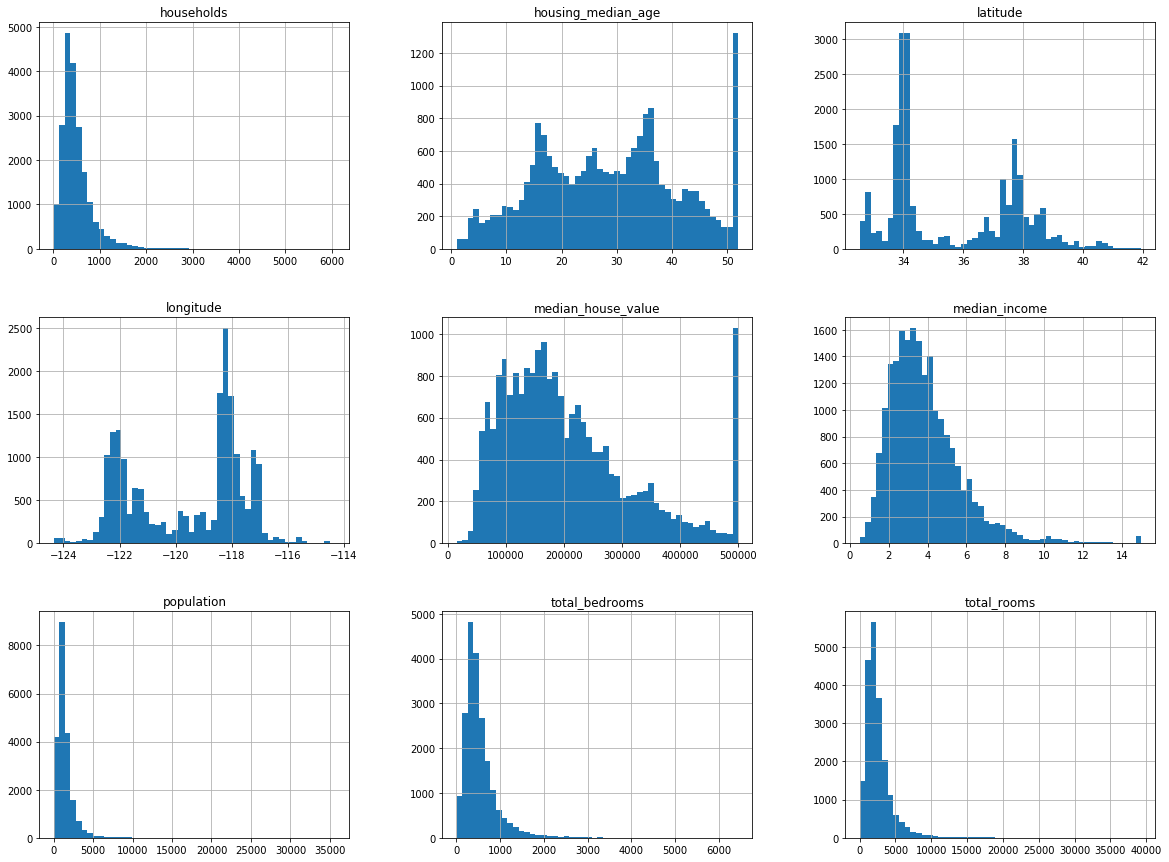

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_df.hist(bins=50, figsize = (20,15))
plt.show()

## Splitting into Test and Train Set
* data snooping bias -- Attempt to fit the alogorithm by looking at the pattern of data.
* Random Sampling vs Stratified Sampling


In [8]:
import numpy as np

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indices =  np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices =  shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [10]:
train_set, test_set = split_train_test(housing_df, 0.2)
print(len(train_set), " train + ", len(test_set), " test")

16512  train +  4128  test


In [11]:
housing_df["median_income"].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [12]:
housing_df["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
3.8750     41
3.0000     38
3.3750     38
3.6250     37
4.0000     37
4.3750     35
2.1250     33
2.3750     32
4.6250     31
3.5000     30
3.2500     29
3.7500     29
4.8750     29
1.6250     29
2.2500     29
4.2500     28
2.5000     28
3.6875     26
2.7500     25
4.5000     24
2.5625     21
1.8750     21
5.0000     20
3.0625     19
4.4375     18
           ..
5.7780      1
1.3672      1
4.6420      1
2.5389      1
6.2113      1
2.1975      1
6.0591      1
2.1403      1
1.5161      1
4.0037      1
1.9306      1
4.0517      1
3.5082      1
5.2649      1
6.7744      1
4.0677      1
2.1216      1
4.1449      1
6.0808      1
5.6263      1
4.8283      1
2.5599      1
7.3031      1
2.7209      1
2.1630      1
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [13]:
housing_df["income_cat"] = np.ceil(housing_df["median_income"]/1.5)
housing_df["income_cat"].where(housing_df["income_cat"] < 5, 5.0, inplace =  True)

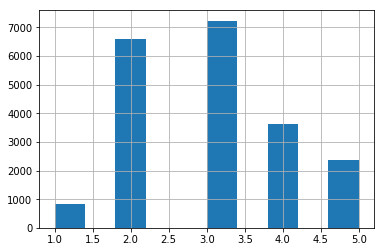

In [14]:
housing_df["income_cat"].hist()
plt.show()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df["income_cat"]):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]

In [16]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis =  1, inplace =  True)


In [17]:
housing_df = strat_train_set.copy()

## Gain Insight from Visualization

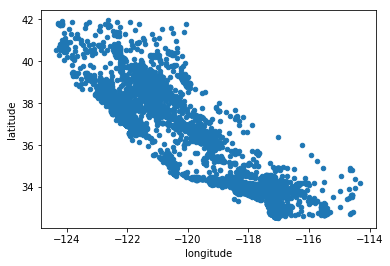

In [18]:
housing_df.plot(kind = "scatter", x = "longitude", y = "latitude")
plt.show()

Setting `alpha` to `0.1` helps visualize the density of the population

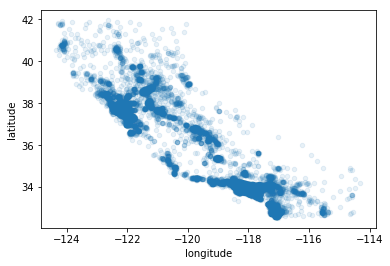

In [19]:
housing_df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)
plt.show()

Need some clarification on the parameters used in map call below.

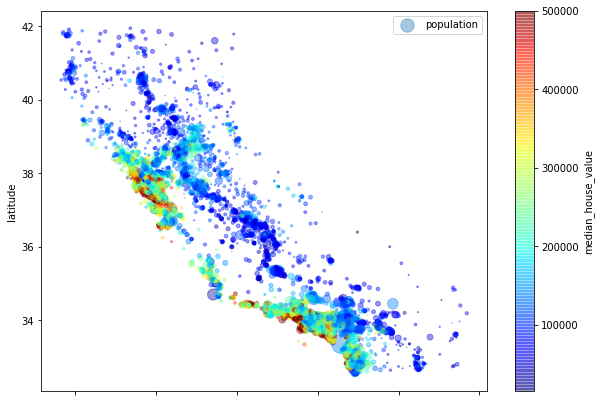

In [20]:
housing_df.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.4, 
                s = housing_df["population"]/100, label = "population", figsize = (10,7), 
                c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)

### Looking for correlation among attributes
* Question - What are different types of coorelation apart from Pearson correlation.


In [21]:
corr_matrix = housing_df.corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [23]:
import folium

In [24]:
map = folium.Map(location=[housing_df['latitude'].mean(), housing_df['longitude'].mean()], zoom_start=6)
i = 0
for lat, lng, value in zip(housing_df['latitude'], housing_df['longitude'], housing_df['median_house_value']):
    i = i + 1
    if i < 1400:
        folium.CircleMarker(
        [lat, lng],
        popup = str(value),
        radius=2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map)
map

In [25]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


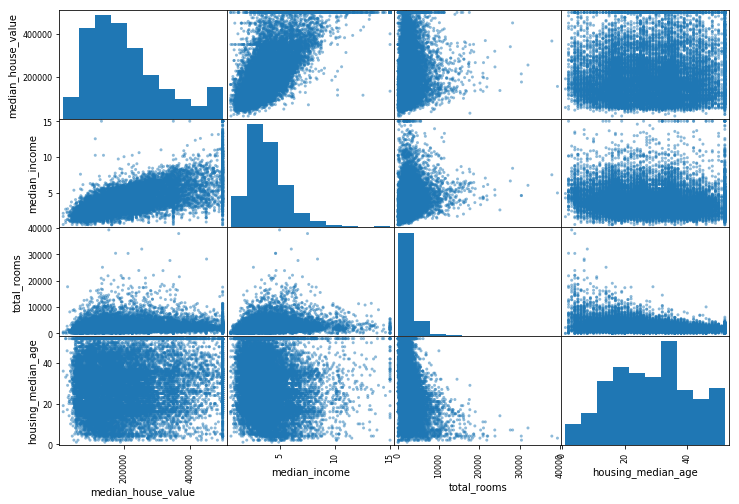

In [26]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing_df[attributes], figsize=(12,8))
plt.show()

### Median Income vs median house value correlation
Notice the horizontal lines @500K, 450K, 350K and also around 280K

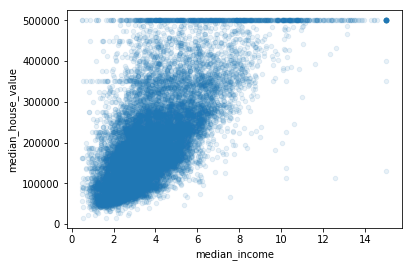

In [27]:
housing_df.plot(kind='scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.show()

### Experimenting with attribute combinations
Create additional interesting attributes such as -
* Number of bedrooms compared to number of rooms
* Population per households
* Rooms per households

In [28]:
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

In [29]:
corr_matrix = housing_df.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Preparing the data for Machine Learning Alorithms
Make a copy of data and remove target label from train set.


In [30]:
housing_df = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()


#### Data Cleaning
3 Options for missing values
1. Drop the rows where feature value is missing
1. Drop the feature itself
3. Fill the missing values with median

In [31]:
#housing_df.dropna(subset=['total_bedrooms']) # option 1
#housing_df.drop('total_bedrooms', axis=1)  #option 2
#median = housing_df['total_bedrooms'].median()
#housing_df['total_bedrooms'].fillna(median, inplace =  True) #option 3

#### Imputer
Question - What are different strategy that class Imputer can be initialized with?

In [32]:
from sklearn.preprocessing import Imputer

In [33]:
imputer = Imputer(strategy = 'median')
housing_num =  housing_df.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [34]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
X  = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [36]:
housing_cat = housing_df['ocean_proximity']

In [37]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [38]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [39]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1,1)
housing_cat_onehot = one_hot_encoder.fit_transform(housing_cat_reshaped)


### Custom Transformers
* Python supports multiple inheritence.
* Duck Type - Presence of methods dictates the type. This is used in Scikit-Learn for determine the types.


In [40]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

In [41]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y =None):
        return self
    
    def transform(self, X, y = True):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household= X[:, population_ix]/ X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
            

In [42]:
attr_addr = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_addr.transform(housing_df.values)

#### Feature Scaling
* MinMax Scaling
..* (X - min)/(max-min)
..* Scikit-Learn class `MinMaxScaler`

* Standardization 
** (X - mean)/standard dev
** Scikit-Learn class `StandardScaler`

#### Transformation Pipelines

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num);


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

    
    

In [45]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder())
])


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


##### Combining the output from two pipelines

In [46]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [47]:
housing_prepared = full_pipeline.fit_transform(housing_df)

### Select and Train a Model
#### Training and Evaluating on the Training Set


In [48]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Trying out sample training data on the model


In [49]:
some_data = housing_df.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepend = full_pipeline.transform(some_data)
print("Predictions : ", lin_reg.predict(some_data_prepend))
print("Labels: ", list(some_labels))

Predictions :  [210644.60467751 317768.80666371 210956.43335671  59218.98897265
 189747.55852952]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### Evaluation using RMSE

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [51]:
lin_reg.coef_

array([-55650.4116189 , -56716.45238427,  13732.83865496,  -1933.12768167,
         7330.0405978 , -45708.26300048,  45455.47522174,  74714.39128946,
         6605.12780975,   1042.95724547,   9249.75855968, -18016.52436473,
       -55219.15205085, 110357.78363965, -22479.84007418, -14642.26715033])

### DecesionTree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [53]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation Using Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

tree_rmse_scores= np.sqrt(-scores)


In [55]:
def display_scroes(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Std. Dev: ', scores.std())


In [56]:
display_scroes(tree_rmse_scores)

Scores:  [67782.64016266 65647.21565618 69574.61263882 69182.47249809
 71322.79064972 74619.56333797 70656.41312867 71895.79991031
 76177.31612326 70537.6129307 ]
Mean:  70739.64370363869
Std. Dev:  2912.135503613509


#### Linear Regression cross validation scores

In [57]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scroes(lin_rmse_scores)


Scores:  [66782.73841183 66960.11778218 70347.95251777 74739.57052388
 68031.13393582 71193.84184614 64969.63059075 68281.61137929
 71552.91569781 67665.10084428]
Mean:  69052.4613529765
Std. Dev:  2731.6740263774286


#### Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring = "neg_mean_squared_error", cv = 10)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scroes(forest_rmse_scores)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_predictions, housing_labels)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [51420.83398409 49495.07389135 52922.37754482 54106.84474075
 52294.00038413 54187.77794851 52120.39978956 50706.10592117
 55650.12224591 52742.86649312]
Mean:  52564.640294341065
Std. Dev:  1707.2839884379696


22302.532824855953

### Fine Tune Your Model

#### Grid Search
`GridSearchCV` with `RandomForestRegressor` to search optimum values for hyperparamters

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}, 
              {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features': [2,3,4] }]


In [60]:
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')

In [61]:
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
    

In [62]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Cross validation scores are also available :

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip (cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64140.62569501532 {'max_features': 2, 'n_estimators': 3}
56119.18258701346 {'max_features': 2, 'n_estimators': 10}
53278.246588591406 {'max_features': 2, 'n_estimators': 30}
59856.04069433357 {'max_features': 4, 'n_estimators': 3}
52938.63459917188 {'max_features': 4, 'n_estimators': 10}
50971.73740190877 {'max_features': 4, 'n_estimators': 30}
58662.350626570034 {'max_features': 6, 'n_estimators': 3}
52536.18378200607 {'max_features': 6, 'n_estimators': 10}
49948.07573735538 {'max_features': 6, 'n_estimators': 30}
59290.00523834632 {'max_features': 8, 'n_estimators': 3}
51651.79189413783 {'max_features': 8, 'n_estimators': 10}
50224.85089299725 {'max_features': 8, 'n_estimators': 30}
62834.2586246518 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54461.660963143535 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60332.88200530581 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52714.470219761744 {'bootstrap': False, 'max_features': 3, 'n_estimators':

#### Randomized Search
* Runs iterations with random selections for hyperparamters.
* Control over computing resources by specifying number of iterations

Implementation is as given below -


In [65]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]}

random_search = RandomizedSearchCV(forest_reg, cv = 10 , n_iter = 3, param_distributions= param_distributions)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None

In [66]:
random_search.best_params_

{'n_estimators': 30, 'max_features': 6}

### Evaluate Your System on Test Set

In [67]:
final_model = random_search.best_estimator_
X_test = strat_test_set.drop('median_house_value', axis = 1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47859.13502326497

### Exercises
1. SVM Implementation

In [74]:
from sklearn.svm import SVR

svr = SVR()

param_grid = [{'C': [3,10,30], 'kernel': ['linear']}, 
              {'kernel' : ['rbf'], 'gamma' : [2,4,6,8], 'C': [3,10,30]}]

grid_search_svr = GridSearchCV(svr, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_svr.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [3, 10, 30], 'kernel': ['linear']},
                         {'C': [3, 10, 30], 'gamma': [2, 4, 6, 8],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [76]:
print(grid_search_svr.best_params_)
cvres = grid_search_svr.cv_results_
for mean_score, params in zip (cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

{'C': 30, 'kernel': 'linear'}
102396.40414799473 {'C': 3, 'kernel': 'linear'}
84654.0893002138 {'C': 10, 'kernel': 'linear'}
75448.84743960595 {'C': 30, 'kernel': 'linear'}
118893.44462798245 {'C': 3, 'gamma': 2, 'kernel': 'rbf'}
118911.88072862232 {'C': 3, 'gamma': 4, 'kernel': 'rbf'}
118917.48782694618 {'C': 3, 'gamma': 6, 'kernel': 'rbf'}
118920.0329459061 {'C': 3, 'gamma': 8, 'kernel': 'rbf'}
118828.78373474385 {'C': 10, 'gamma': 2, 'kernel': 'rbf'}
118900.29825202098 {'C': 10, 'gamma': 4, 'kernel': 'rbf'}
118908.16004777621 {'C': 10, 'gamma': 6, 'kernel': 'rbf'}
118914.58230745114 {'C': 10, 'gamma': 8, 'kernel': 'rbf'}
118607.45011077618 {'C': 30, 'gamma': 2, 'kernel': 'rbf'}
118841.92546137396 {'C': 30, 'gamma': 4, 'kernel': 'rbf'}
118893.47044151826 {'C': 30, 'gamma': 6, 'kernel': 'rbf'}
118907.87288207194 {'C': 30, 'gamma': 8, 'kernel': 'rbf'}
